This notebook contains notes and Homework

Homework 1

1.	Install Python (if you don’t have it already) and install NLTK.  

2.	Follow the instructions in chapter 1 of Bird-Klein for implementing a “lexical diversity” scoring routine.

3.	Go to http://www.gutenberg.org/ebooks/bookshelf/215  and select texts of different grade levels (e.g., fourth reader, fifth reader et al)
Report the lexical diversity score of each. Explain whether the result was surprising.

4.	Also compare the vocabulary size of the same three texts. Explain whether the result was surprising.  

5.	Write a paragraph arguing whether vocabulary size and lexical diversity in combination could be a better measure of text difficulty (or reading level) than either measure is by itself.


## Jump to Homework

<a href="#hmw">Homework : </a> use this embedded link to skip notes and go right to the homework. 

### Notes from Text Book.

Before going further you should install NLTK 3.0, downloadable for free from http://nltk.org/. Follow the instructions there to download the version required for your platform.

Once you've installed NLTK, start up the Python interpreter as before, and install the data required for the book by typing the following two commands at the Python prompt, then selecting the book collection as shown in 1.1.

In [1]:
import nltk
import requests
import numpy as np
from sklearn.preprocessing import minmax_scale

In [6]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Once the data is downloaded to your machine, you can load some of it using the Python interpreter. The first step is to type a special command at the Python prompt which tells the interpreter to load some texts for us to explore: from nltk.book import *. This says "from NLTK's book module, load all items." The book module contains all the data you will need as you read this chapter. After printing a welcome message, it loads the text of several books (this will take a few seconds). Here's the command again, together with the output that you will see. Take care to get spelling and punctuation right, and remember that you don't type the >>>.

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### 1.3   Searching Text
There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word monstrous in Moby Dick by entering text1 followed by a period, then the term concordance, and then placing "monstrous" in parentheses:


The first time you use a concordance on a particular text, it takes a few extra seconds to build an index so that subsequent searches are fast.

Once you've spent a little while examining these texts, we hope you have a new sense of the richness and diversity of language. In the next chapter you will learn how to access a broader range of text, including text in languages other than English.

A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as the ___ pictures and a ___ size . What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [3]:
print(text1.similar("monstrous"))
#text1: Moby Dick by Herman Melville 1851


true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless
None


In [4]:
str(text1)

'<Text: Moby Dick by Herman Melville 1851>'

In [3]:
print(text2.similar("monstrous"))
#text2: Sense and Sensibility by Jane Austen 1811

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly
None


The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma

In [4]:
text2.common_contexts(["monstrous", "very"])


a_pretty am_glad a_lucky is_pretty be_glad


It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text. In 1.2 we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end). You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? As before, take care to get the quotes, commas, brackets and parentheses exactly right.

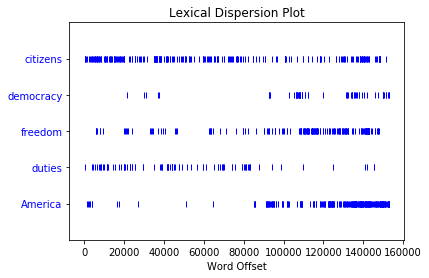

In [5]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [6]:
text3.generate()

Building ngram index...


laid by her , and said unto Cain , Where art thou , and said , Go to ,
I will not do it for ten ' s sons ; we dreamed each man according to
their generatio the firstborn said unto Laban , Because I said , Nay ,
but Sarah shall her name be . , duke Elah , duke Shobal , and Akan .
and looked upon my affliction . Bashemath Ishmael ' s blood , but Isra
for as a prince hast thou found of all the cattle in the valley , and
the wo The


"laid by her , and said unto Cain , Where art thou , and said , Go to ,\nI will not do it for ten ' s sons ; we dreamed each man according to\ntheir generatio the firstborn said unto Laban , Because I said , Nay ,\nbut Sarah shall her name be . , duke Elah , duke Shobal , and Akan .\nand looked upon my affliction . Bashemath Ishmael ' s blood , but Isra\nfor as a prince hast thou found of all the cattle in the valley , and\nthe wo The"

**1.4   Counting Vocabulary**<br />
The most obvious fact about texts that emerges from the preceding examples is that they differ in the vocabulary they use. In this section we will see how to use the computer to count the words in a text in a variety of useful ways. As before, you will jump right in and experiment with the Python interpreter, even though you may not have studied Python systematically yet. Test your understanding by modifying the examples, and trying the exercises at the end of the chapter.

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. We use the term len to get the length of something, which we'll apply here to the book of Genesis

In [7]:
len(text3)

44764

So Genesis has 44,764 words and punctuation symbols, or "tokens." A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase to be or not to be, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not. But there are only four distinct vocabulary items in this phrase. How many distinct words does the book of Genesis contain? To work this out in Python, we have to pose the question slightly differently. The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. In Python we can obtain the vocabulary items of text3 with the command: set(text3). When you do this, many screens of words will fly past. Now try the following

In [ ]:
set(text3)

In [14]:
sorted(set(text3)) #1

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [15]:
 len(set(text3)) #2

2789

By wrapping sorted() around the Python expression set(text3) [1], we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with A. All capitalized words precede lowercase words. We discover the size of the vocabulary indirectly, by asking for the number of items in the set, and again we can use len to obtain this number [2]. Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average (remember if you're using Python 2, to start with from __future__ import division).

In [16]:
len(set(text3)) / len(text3)
0.06230453042623537

0.06230453042623537

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [17]:
text3.count("smote")

5

You may want to repeat such calculations on several texts, but it is tedious to keep retyping the formula. Instead, you can come up with your own name for a task, like "lexical_diversity" or "percentage", and associate it with a block of code. Now you only have to type a short name instead of one or more complete lines of Python code, and you can re-use it as often as you like. The block of code that does a task for us is called a function, and we define a short name for our function with the keyword def. The next example shows how to define two new functions, lexical_diversity() and percentage():



In [18]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [19]:
def percentage(count, total):
    return 100 * count / total

In the definition of lexical_diversity() [1], we specify a parameter named text . This parameter is a "placeholder" for the actual text whose lexical diversity we want to compute, and reoccurs in the block of code that will run when the function is used [2]. Similarly, percentage() is defined to take two parameters, named count and total [3].

Once Python knows that lexical_diversity() and percentage() are the names for specific blocks of code, we can go ahead and use these functions:

In [20]:
lexical_diversity(text5)

0.13477005109975562

In [21]:
percentage(4, 5)

80.0

In [22]:
percentage(text4.count('a'), len(text4))

1.457806031353621

To recap, we use or call a function such as lexical_diversity() by typing its name, followed by an open parenthesis, the name of the text, and then a close parenthesis. These parentheses will show up often; their role is to separate the name of a task — such as lexical_diversity() — from the data that the task is to be performed on — such as text3. The data value that we place in the parentheses when we call a function is an argument to the function.

You have already encountered several functions in this chapter, such as len(), set(), and sorted(). By convention, we will always add an empty pair of parentheses after a function name, as in len(), just to make clear that what we are talking about is a function rather than some other kind of Python expression. Functions are an important concept in programming, and we only mention them at the outset to give newcomers a sense of the power and creativity of programming. Don't worry if you find it a bit confusing right now.

Later we'll see how to use functions when tabulating data, as in 1.1. Each row of the table will involve the same computation but with different data, and we'll do this repetitive work using a function.

___

## Start Homework
<a id="hmw"></a>
___

In [11]:
text_urls = {
    'THE ADVENTURES OF TOM SAWYER : 4 grade' : 'https://www.gutenberg.org/ebooks/74.txt.utf-8',
    'Adventures of Huckleberry Finn: 6 grade': 'https://www.gutenberg.org/ebooks/76.txt.utf-8',
    'On War : 12 grade' : 'https://www.gutenberg.org/ebooks/1946.txt.utf-8'
}

In [ ]:
vocab

In [24]:
books_by_url = {}
def get_book_text(url):
    if url in books_by_url:
        return books_by_url[url]
    text = requests.get(url).text
    books_by_url[url] = text
    return text

In [25]:
def get_diversity_all_texts():
    for text_level in text_urls:
        url = text_urls[text_level]
        text = get_book_text(url)
        diversity = lexical_diversity(text)
        print('text_diversity {} | Title: {}'.format(diversity, text_level))
get_diversity_all_texts()

text_diversity 0.00020622368870178634 | Title: THE ADVENTURES OF TOM SAWYER : 4 grade
text_diversity 0.00014341667985440733 | Title: Adventures of Huckleberry Finn: 6 grade
text_diversity 0.00014015395372763312 | Title: On War : 12 grade


In [26]:
def get_vocabulary_size_all_texts():
    for text_level in text_urls:
        url = text_urls[text_level]
        text = get_book_text(url)
        unique_characters = set(text)
        vocabulary_size = len(unique_characters)
        print('vocabulary size {} | Title: {}'.format(vocabulary_size, text_level))
get_vocabulary_size_all_texts()

vocabulary size 87 | Title: THE ADVENTURES OF TOM SAWYER : 4 grade
vocabulary size 87 | Title: Adventures of Huckleberry Finn: 6 grade
vocabulary size 91 | Title: On War : 12 grade


# Summary of Results

### Thoughts on the texts 
First had some trouble finding books relevant to the a specific grade then locating a copy that on the Gutenburg project. Instead, I thought of books that are likely past their publishers copyright date and have made their way into the public domain. Note that charactorization of the grade level of books is somewhat speculative based on a few google searches. Perhaps 4th and 6th grade is a bit optimistic in today's world. But perhaps once were relevant in a world that existed before internet and cable TV. 


Having read all three i can attest that the difficulty of the books ascends in order. With a marked jump from penultimate Huck Fin, to final book On War. It is a diffuclt text. The author, Carl von Clauswitz, employs the didatic method to explore his philosophy of War and its role in European/World politics.  On War, is the de-facto book on the Western philosphy of war.  Why countries go to war, How they intend to win, What the objectives of going to war are. These differ somwhat from the Eastern or Chinese philosphy, the African continent, and New World cultures. 

### Vocabualry.
It does astonished me that vocabulary size is only set apart by 4. Not so surprising that Tom Sawyer and Huckleberry Fin are of equal vocab strength. Since both texts come from the lexicon of a singular author. Is this a good measure of what we might consider vocabulary. We are looking at the length of the number of unique words divided by the length of all the words. To me the list seem rather small. That the sum of all words in the text.

### Lexical Diversity 

Is giving a score of how often any one word is repeated in a text. So if a text is long and varies in its use of lexicon (vocabulary) it will have a very low lixcal diversity score. Indicating that the text doesn't repeat the use of words often. Likewise a higher score shows that text doesn't vary much. Something we'd expect from a childrens book. The themes of the book are limited and the scope of narrative as well. 

I think what often sets the two books apart in grade level is not the complexity of the text but the social complexity that which the text deals with. Huck Fin deals in large part with slavery.  Published just 20 years after its abolition in the United States. It is often forgot that one intention of Mark Tawain is to mock the instution. Shed light upon the hypcrosiy by having Huckleberry Fin enslaved by his father escape and go on an adventure with Jim an escaped black slave. And also use the two as a literary device to show how the two worlds of white and black american are intertwined. In a similar vain i've seen the similar misinterpreations of texts like Frankenstien. Where people wonder out loud if Frankenstien's monster wasn't really a monster afterall just misunderstood. When in fact that is in the story. 

Taken this into account one can see that vocabulary is a crude approximation of text difficulty. Certaintly, it has its place. The line gets blurred as we step away children's books. Whose purpose is to develop literacy in developing minds. And into the larger body of texts that comprise the cannon of cultural literature. The text diversity and vocabulary are one abstraction that can inform. But then again all models are wrong some are useful.  